In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import BatchNormalization

IMG_SIZE = (299, 299)
multi_class_names = ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus',
                     'FU-ringworm','Normal', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']
class CustomBatchNormalization(BatchNormalization):
    def get_config(self):
        config = super().get_config()
        config['axis'] = -1
        return config

multi_model = load_model(
    r"C:\Users\ahmed\OneDrive\Desktop\Files\Skin\Skin.h5",
    custom_objects={'CustomBatchNormalization': CustomBatchNormalization}
)

In [2]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Could not load image: {img_path}")
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, IMG_SIZE)
    img_preprocessed = preprocess_input(img_resized.astype('float32'))
    return np.expand_dims(img_preprocessed, axis=0), img_rgb

def classify_image(img_path):
    try:
        img_input, img_display = preprocess_image(img_path)

        plt.imshow(img_display)
        plt.axis('off')
        plt.title("Test Image")
        plt.show()

        multi_pred = multi_model.predict(img_input)[0]
        disease_index = np.argmax(multi_pred)
        disease_label = multi_class_names[disease_index]
        disease_conf = multi_pred[disease_index] * 100

        print(f"Disease Type: {disease_label} ({disease_conf:.2f}%)")

    except Exception as e:
        print(str(e))


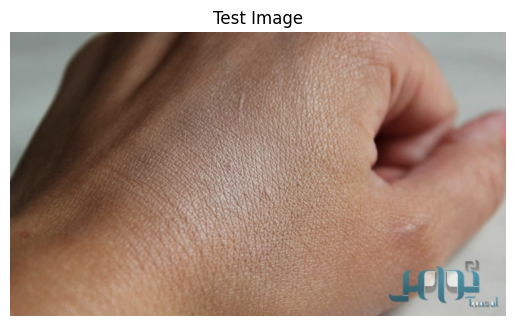

1/1 [==============================] - 1s 1s/step
Disease Type: Normal (100.00%)


In [3]:
img_path = r"C:\Users\ahmed\OneDrive\Desktop\Files\tasks\R.jpg"
classify_image(img_path)